## Solving:

## Band structure of simple wire

## Import libraries

In [1]:
import kwant

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 24})

import os.path
def save_image(name):
    folder = "./figures/"
    #if os.path.exists(folder + name + ".png"):
    #    raise Exception("File already exist")
    #    return 0
    
    plt.savefig(folder + name + ".png", dpi=300)

## Create leads

In [2]:
# defining parameters
a = 1
t = 1
W = 100

lat = kwant.lattice.square(a)

In [3]:
# defining lead
sym_lead = kwant.TranslationalSymmetry((-a, 0))
lead = kwant.Builder(sym_lead)

## Set the matrix elements and hoppings

In [4]:
for j in range(W):
    # on site values
    lead[lat(0, j)] = 4 * t

    # hoppings to next unit cell
    if j > 0:
        lead[lat(0, j), lat(0, j - 1)] = -t
    lead[lat(1, j), lat(0, j)] = -t

In [5]:
lead = lead.finalized()

Text(0, 0.5, 'Energy')

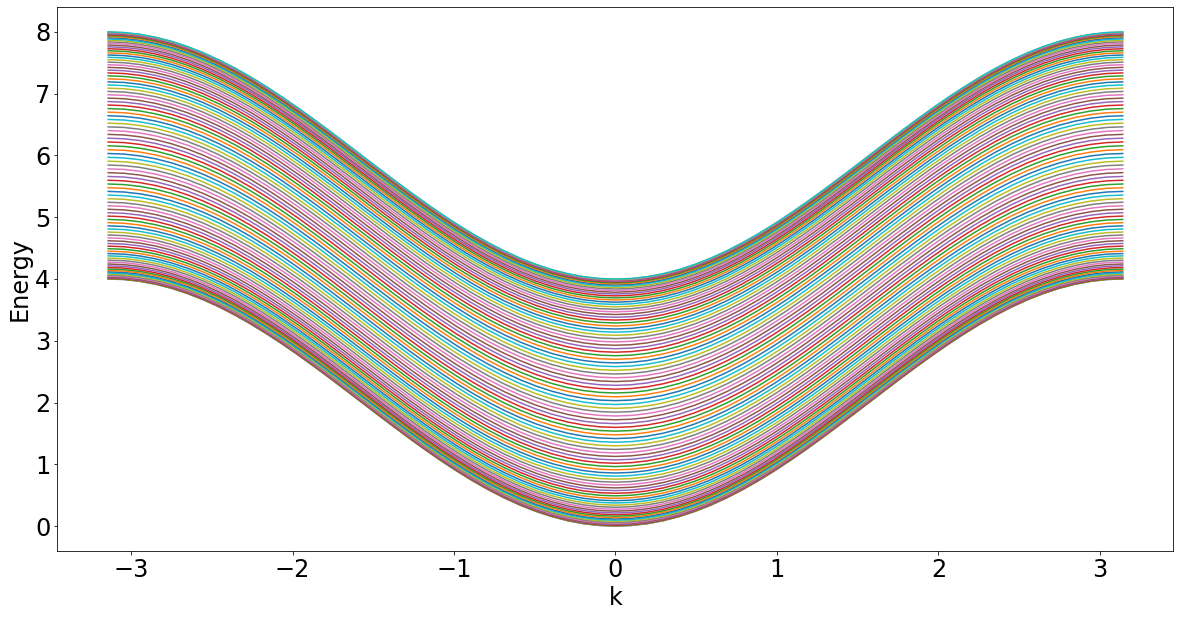

In [8]:
# plotting the band structure of the lead
fig, ax = plt.subplots(1,1, figsize=(20,10))
_ = kwant.plotter.bands(lead, ax=ax, fig_size=(20,10))
ax.set_xlabel("k")
ax.set_ylabel("Energy")
#save_image("band_structure_w100")